# Proyecto 1: Aplicaciones de la física estadística
## Módelo estócastico

Realiza un modelo de una curva que decrece con una variable estócastica. Genera esta función 2,000 veces.

Gráfica la función de valores medios (cada punto es la media de las 2000 imagenes que le corresponden)

Calcula la desviación estándar y reflejala en la grafica anterior.

Calcula un número n de coeficientes de correlación de n puntos de la gráfica con todos los demás.


In [ ]:
# instalamos e importamos las librerías necesarias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rnd


Text(0.5, 0, 'Número de tiros realizados')

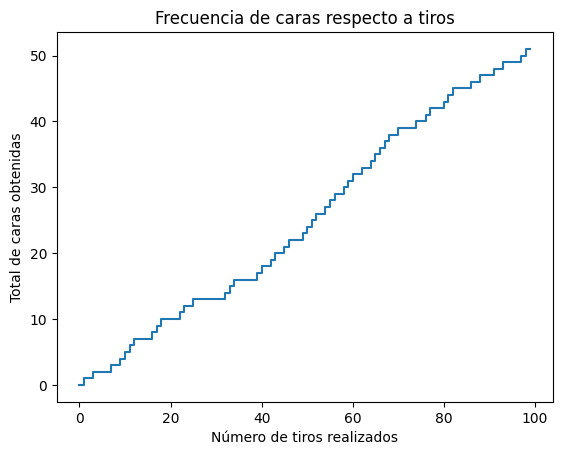

In [ ]:
# Graficar flip a coin 100 times
n_head=0
x = range(100)
y = np.zeros(100)
for i in range (100):
  n_head = n_head + rnd.randint(0,1)
  y[i]=n_head

plt.step(x, y)
plt.title('Frecuencia de caras respecto a tiros')
plt.ylabel('Total de caras obtenidas')
plt.xlabel('Número de tiros realizados')


In [ ]:
# Definimos el rango t sobre el que evaluaremos la función estócastica
X = np.linspace(0.5, 10.5, 400)

In [ ]:
# Definimos la altura de la función
h = 10

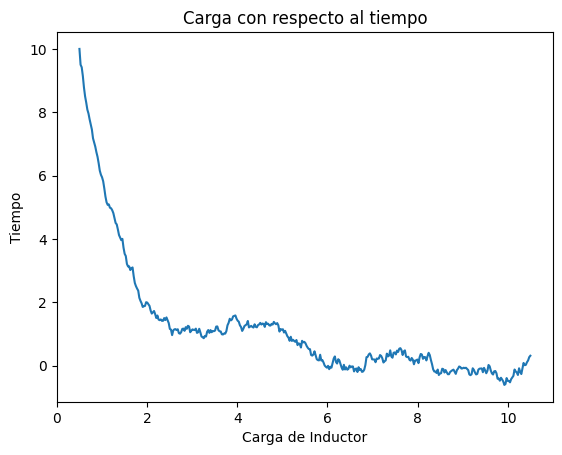

In [ ]:
#Graficamos 1 vez la función
Y = np.zeros(400, dtype=np.float32)
n = 0
for i in X:
  if n == 0:
    Y[n]= h
  else:
    Y[n]=Y[n-1]*(0.978) + (0.3)*rnd.gauss(mu=0, sigma=0.3)
  n=n+1

plt.plot(X, Y)
plt.title('Carga con respecto al tiempo')
plt.ylabel('Carga de Inductor')
plt.xlabel('Tiempo')

plt.show()

In [ ]:
#Creamos un diccionario para guardar las funciones
Funciones = {'función'+str(k+1):0 for k in range (2000)}



Text(0, 0.5, 'Tiempo')

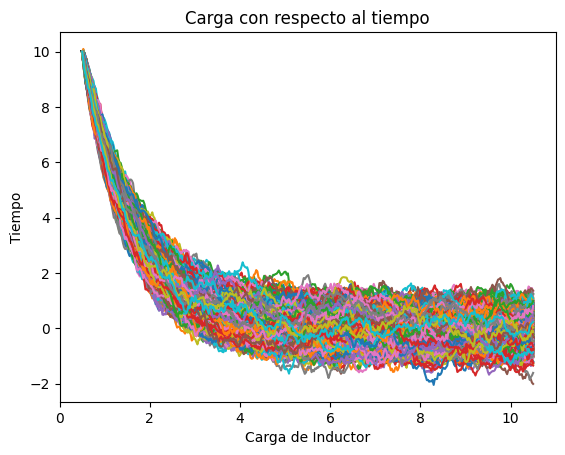

In [ ]:
#Llenamos el diccionario con los valores generados de cada una de las 2000 funciones
for j in range (2000):
  Y = np.zeros(400, dtype=np.float32)
  n = 0
  for i in X:
    if n == 0:
      Y[n]= h
    else:
      Y[n]=Y[n-1]*(0.978) + (0.3)*rnd.gauss(mu=0, sigma=0.3)
    n=n+1
  Funciones['función'+str(j+1)]=Y
  plt.plot(X, Y)
plt.title('Carga con respecto al tiempo')
plt.ylabel('Carga de Inductor')
plt.xlabel('Tiempo')

In [ ]:
#Convertimos el diccionario en un DF de pandas para analizar sus propiedades estadísticas
Fun = pd.DataFrame(Funciones)

In [ ]:
print(Fun)

      función1   función2   función3   función4   función5   función6  \
0    10.000000  10.000000  10.000000  10.000000  10.000000  10.000000   
1     9.706448   9.819536   9.734543   9.919796   9.854302   9.690598   
2     9.411576   9.551570   9.552248   9.650241   9.759154   9.573544   
3     9.054082   9.286031   9.395484   9.456942   9.427652   9.240454   
4     8.823467   9.178182   9.137632   9.154041   9.219788   9.128603   
..         ...        ...        ...        ...        ...        ...   
395  -0.524983  -0.404228   0.218951   0.373908   0.528406   0.338381   
396  -0.545562  -0.397008   0.234941   0.499276   0.783623   0.312931   
397  -0.481108  -0.471449   0.118352   0.393670   0.814043   0.351604   
398  -0.466169  -0.263214   0.106197   0.330615   0.862065   0.451255   
399  -0.517879  -0.178009   0.114921   0.155224   0.906309   0.439294   

      función7   función8   función9  función10  ...  función1991  \
0    10.000000  10.000000  10.000000  10.000000  ...  

In [ ]:
#Calculamos la función de valores medios y la desviación estándar
media = np.zeros(400, dtype=float)
desviacion = np.zeros(400, dtype=float)
for m in range (400):
  media[m] = np.mean(Fun.iloc[m, :])
  desviacion[m] = np.std(Fun.iloc[m, :])


In [ ]:
# Guardamos la varianza en una variable para después normalizar la covarianza
varianza = desviacion**2


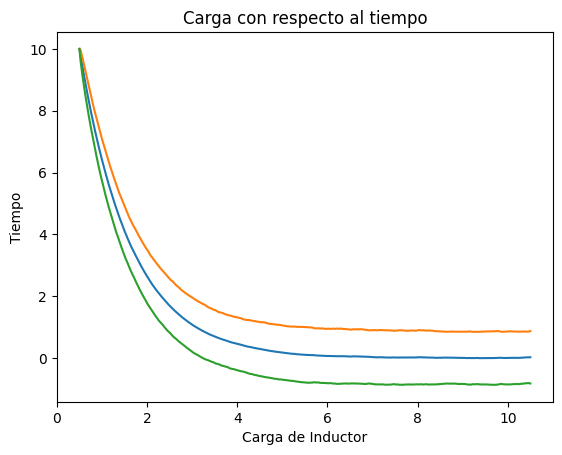

In [ ]:
#Graficamos la función de valores medios con 2 veces la dvst
plt.plot(X, media)
plt.plot(X, media + 2*desviacion)
plt.plot(X, media - 2*desviacion)
plt.title('Carga con respecto al tiempo')
plt.ylabel('Carga de Inductor')
plt.xlabel('Tiempo')

plt.show()

In [ ]:
# Necesitamos un vector que guarde la media del producto entre una variable fija 'x' y las variables 'y'
# MP <- media del producto
# Creamos una función para calcular la covarianza

def cov(xs):
  mp=np.zeros(400, dtype=float)
  ps = float(media[xs])*media
  for n in range (400):
    mp[n]=np.mean(Fun.iloc[xs, :]*Fun.iloc[n, :])
  return mp - ps



In [ ]:
# Definimos una función para normalizar la covarianza
# den es el denominador en la fórmula de el coeficiente de correlación

def CORR(xs):
    den = (float(varianza[xs])*varianza)**(1/2)
    cor=cov(xs)/den
    return cor


<ipython-input-13-04bdbc7cb7d8>:6: RuntimeWarning: divide by zero encountered in divide
  cor=cov(xs)/den


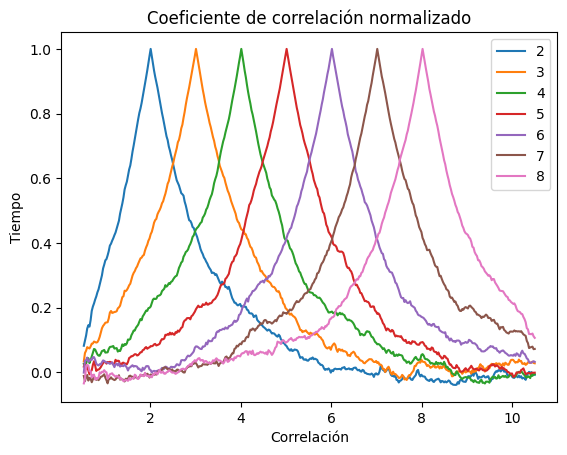

In [ ]:
# Graficamos en 2,4,6 y 8
plt.plot(X, CORR(60), label='2') #2
plt.plot(X, CORR(100), label='3') #3
plt.plot(X, CORR(140), label='4') #4
plt.plot(X, CORR(180), label='5') #5
plt.plot(X, CORR(220), label='6') #6
plt.plot(X, CORR(260), label='7') #7
plt.plot(X, CORR(300), label='8') #8
plt.title('Coeficiente de correlación normalizado')
plt.xlabel('Correlación')
plt.ylabel('Tiempo')
plt.legend()

In [ ]:
# usar función de corrcoef de numpy, cada fila es una variable, y cada columna una observación, con ella se obtiene la covarianza normalizada.

Matriz = Fun.to_numpy()
coff_m = np.corrcoef(Matriz)


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Text(0, 0.5, 'Tiempo')

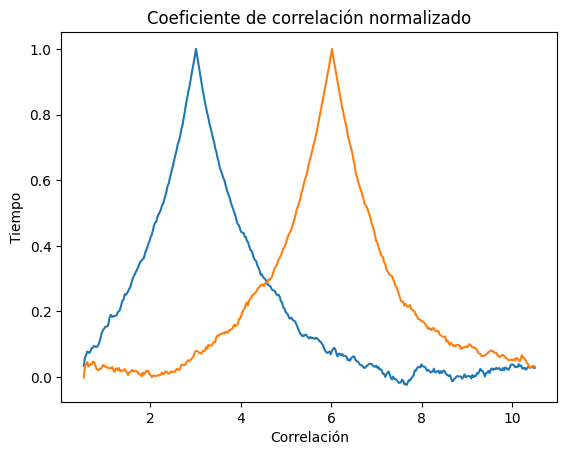

In [ ]:
plt.plot(X, coff_m[100, :])
plt.plot(X, coff_m[220, :])
plt.title('Coeficiente de correlación normalizado')
plt.xlabel('Correlación')
plt.ylabel('Tiempo')

In [ ]:
def Z(x,y):
  x_float = (x-1.5)*40
  x_int = x_float.astype(int)
  y_float = (y-1.5)*40
  y_int = y_float.astype(int)
  val_z = coff_m[x_int,y_int]
  return val_z

In [ ]:

x, y = np.meshgrid(X, X)
z= Z(x,y)


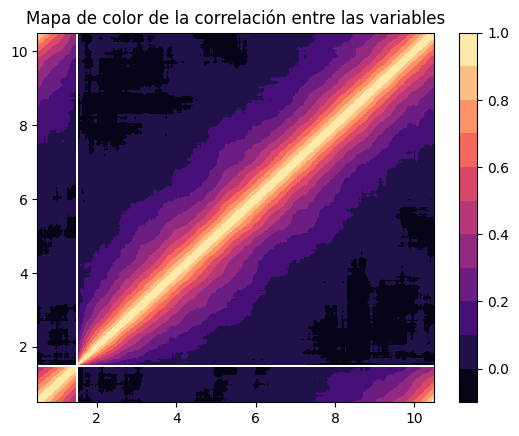

In [ ]:
fig, ax = plt.subplots()
plt.title('Mapa de color de la correlación entre las variables')
g = ax.contourf(x,y,z, levels =10, cmap = 'magma')
fig.colorbar(g)
plt.show()